In [0]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dcorlist = []
dtwlist = []
for i in range(2, 9):
    a = np.genfromtxt(os.path.join(root_path, 'dtw_dcor', 'conv{}_dcor.csv'.format(i)), delimiter=',')
    dcorlist.append(a)
    b = np.genfromtxt(os.path.join(root_path, 'dtw_dcor', 'conv{}_dtw.csv'.format(i)), delimiter=',')
    dtwlist.append(b)

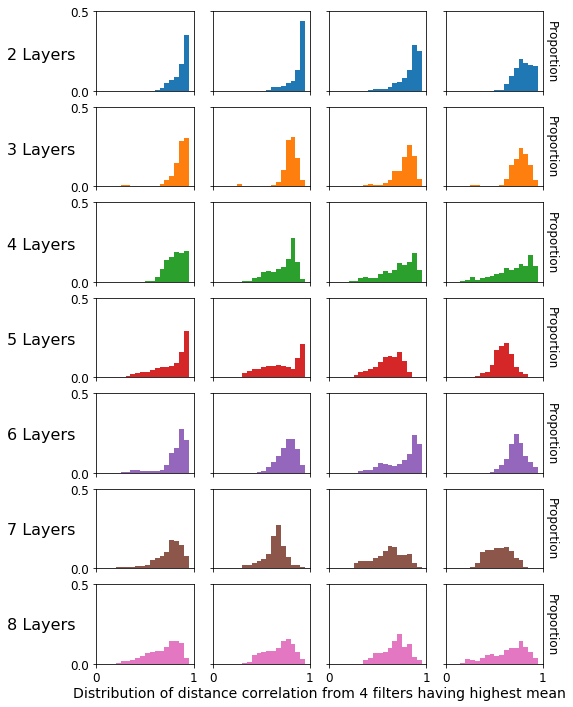

In [65]:
fig, ax = plt.subplots(7, 4, figsize=(8, 12), sharex=True, sharey=True)

fig.text(-0.03, 0.825, '2 Layers', size=16)
fig.text(-0.03, 0.715, '3 Layers', size=16)
fig.text(-0.03, 0.605, '4 Layers', size=16)
fig.text(-0.03, 0.495, '5 Layers', size=16)
fig.text(-0.03, 0.385, '6 Layers', size=16)
fig.text(-0.03, 0.275, '7 Layers', size=16)
fig.text(-0.03, 0.165, '8 Layers', size=16)

ax2 = fig.add_subplot(111, frameon=False)
ax2.yaxis.set_label_position("right")

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Distribution of distance correlation from 4 filters having highest mean", size=14, labelpad=5)

for i in range(7):
    for j in range(4):
        a = ax[i][j]
        if j == 3:
            a.set_ylabel("Proportion", size=12, rotation=270, labelpad=15)
            a.yaxis.set_label_position("right")
        a.hist(dcorlist[i][j], weights=np.ones_like(dcorlist[i][j])/len(dcorlist[i][j]), bins=[0.05*k for k in range(20)], color='C'+str(i))
        a.tick_params(labelsize=12)
    a.set_xticks([0, 1])
    a.set_yticks([0, 0.5])
    a.set_ylim(0, 0.5)
    a.set_xlim(0, 1)
    
fig.savefig(os.path.join(root_path, 'img', 'dcor_shift.pdf'), bbox_inches="tight")

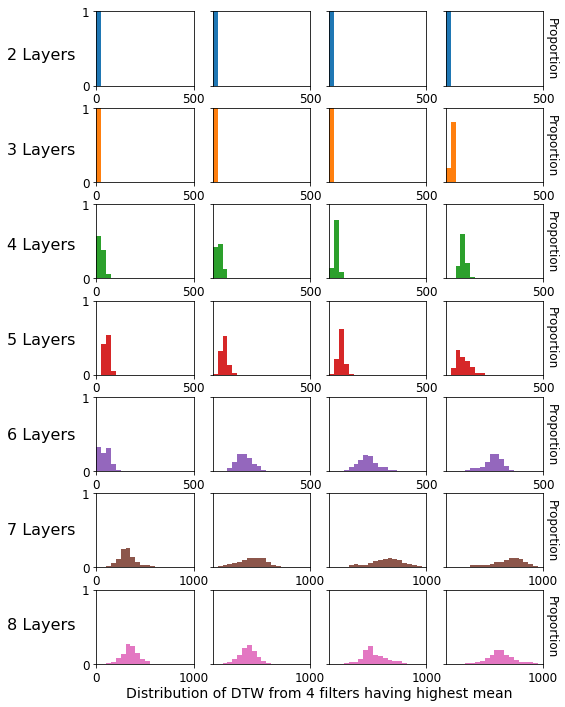

In [63]:
fig, ax = plt.subplots(7, 4, figsize=(8, 12), sharey='row')

fig.text(-0.03, 0.825, '2 Layers', size=16)
fig.text(-0.03, 0.715, '3 Layers', size=16)
fig.text(-0.03, 0.605, '4 Layers', size=16)
fig.text(-0.03, 0.495, '5 Layers', size=16)
fig.text(-0.03, 0.385, '6 Layers', size=16)
fig.text(-0.03, 0.275, '7 Layers', size=16)
fig.text(-0.03, 0.165, '8 Layers', size=16)

ax2 = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Distribution of DTW from 4 filters having highest mean", size=14, labelpad=5)

for i in range(7):
    for j in range(4):
        a = ax[i][j]
        a.tick_params(labelsize=12)
        if j == 3:
            a.set_ylabel("Proportion", size=12, rotation=270, labelpad=15)
            a.yaxis.set_label_position("right")
        if i <= 4:
            a.hist(dtwlist[i][j+12], weights=np.ones_like(dtwlist[i][j+12])/len(dtwlist[i][j+12]), bins=[25 * k for k in range(20)], color='C'+str(i))
        else:
            a.hist(dtwlist[i][j+12], weights=np.ones_like(dtwlist[i][j+12])/len(dtwlist[i][j+12]), bins=[50 * k for k in range(20)], color='C'+str(i))
        if i <= 4:
            a.set_xlim(0, 500)
            if j == 0:
                a.set_xticks([0, 500])
            else:
                a.set_xticks([500])
        else:
            a.set_xlim(0, 1000)
            if j ==0:
                a.set_xticks([0, 1000])
            else:
                a.set_xticks([1000])
        a.set_yticks([0, 1])
        a.tick_params(labelsize=12)
    a.set_ylim(0, 1)    
fig.subplots_adjust(hspace=0.3)
fig.savefig(os.path.join(root_path, 'img', 'dtw_shift.pdf'), bbox_inches="tight")